# A Simple example
Imagine a falling stone, it starts at position $z_0$ and with velocity $v_0$, and it has a constant acceleration of $g$. We define
$$
u_t = \begin{bmatrix}
z_t \\
v_t
\end{bmatrix}
$$
We know the derivative of $u$ with respect to time $t$:
$$
\frac{du_t}{dt} = \begin{bmatrix}
v_t \\
-g
\end{bmatrix}
= 
\begin{bmatrix}
\frac{dz_t}{dt} \\ 
\frac{dv_t}{dt}
\end{bmatrix}
$$

In [1]:
z0 = 10.0
v0 = 0.0
g = 9.81
u0 = [z0, v0]

du_dt(u) = [u[2], -g]

du_dt (generic function with 1 method)

In [2]:
du_dt(u0)

2-element Vector{Float64}:
  0.0
 -9.81

# Integrate numerically
In general, when we want to solve (also named integrate) an ODE numerically, we start with an inital value for the input $x_0$, and apply a rule iteratively:
$$
x_{t+1} = x_t + \Delta t \frac{dx_t}{dt}
$$
This is called Euler's method.

In [3]:
function my_euler(u0, Δu, t_start, t_end, dt)
    us = [u0]
    u = u0
    ts = t_start:dt:t_end
    for _ in ts[1:end-1]
        u = u + dt * Δu(u)
        push!(us, u)
    end
    return hcat(us...)', collect(ts)
end

my_euler (generic function with 1 method)

In [4]:
us_, ts_ = my_euler(u0, du_dt, 0.0, 1.0, 0.02);
size(us_)

(51, 2)

# Comparison to Analytical Solution

In [5]:
t0 = 0
z(t) = z0 .+ v0 * (t .- t0) - g/2 * (t .- t0).^2;
v(t) = v0 .- g * (t .- t0);

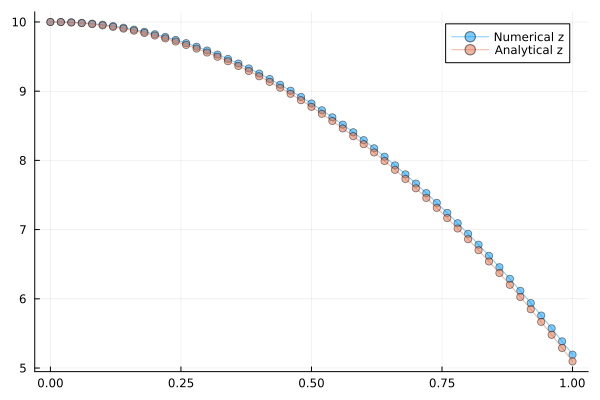

In [6]:
using Plots

zs_ = us_[:, 1]
vs_ = us_[:, 2]
plot(ts_, zs_, label="Numerical z", marker=:circle, alpha=0.5)
plot!(ts_, z(ts_), label="Analytical z", marker=:circle, alpha=0.5)